# CIS Summer Bootcamp - Data Science - Day 2

## Session Tittle : Data Cleaning

###### Data cleaning is a key part of data science, but it can be deeply frustrating..!
- Why are some of your text fields garbled?
- What should you do about those missing values?
- Why aren’t your dates formatted correctly?
- How can you quickly clean up inconsistent data entry? 


In this workshop, you'll learn why you've run into these problems and, more importantly, how to fix them!

##  Data Cleaning
Data cleaning is the single most important and time-consuming part of data analysis.you may need to come back to it during the whole analysis process now and then.

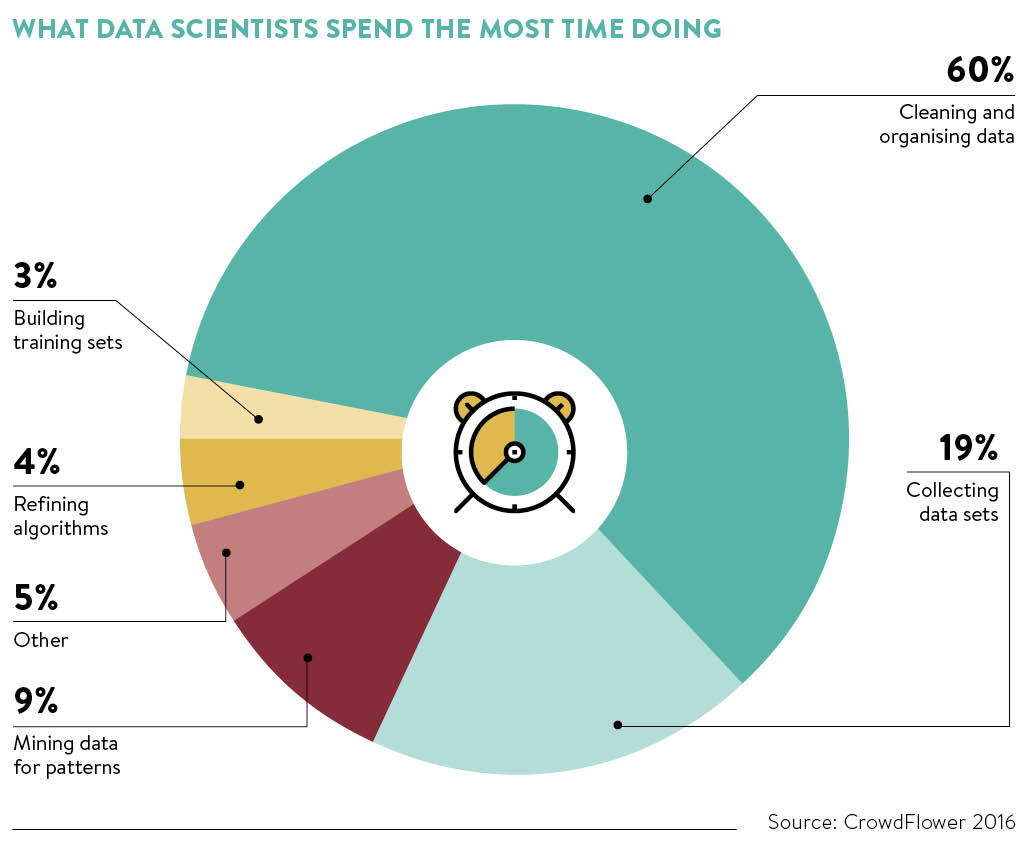

===================================================================================================================


## Who's Calling Which Data are Dirty?

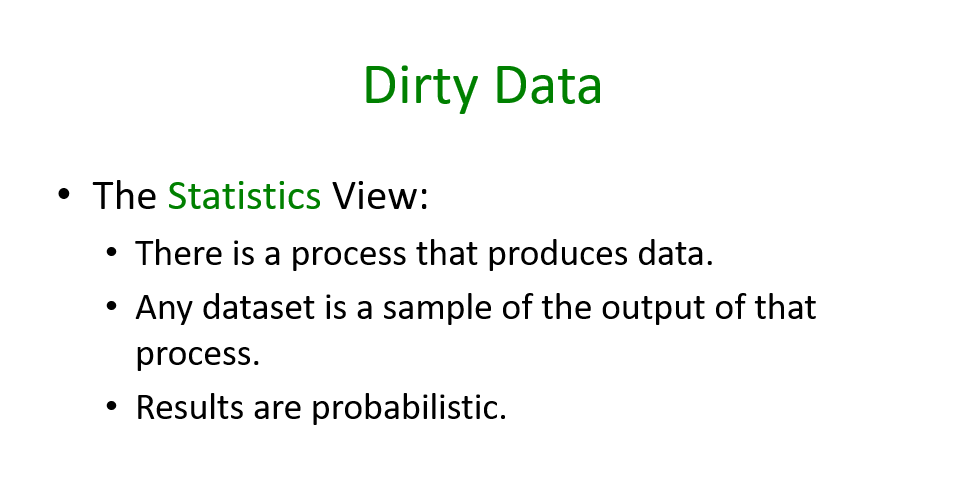

===================================================================================================================

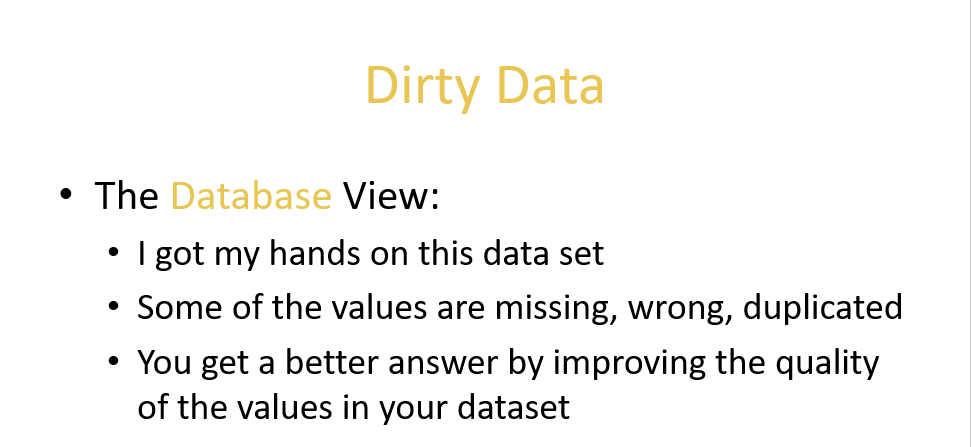

===================================================================================================================


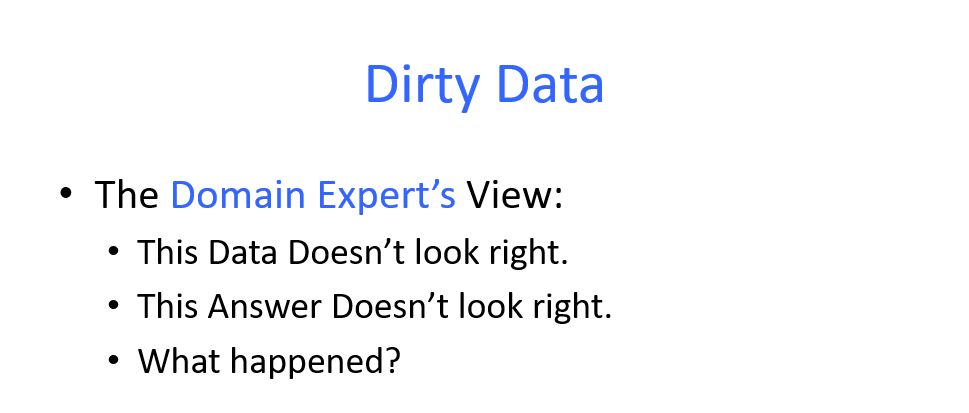

===================================================================================================================

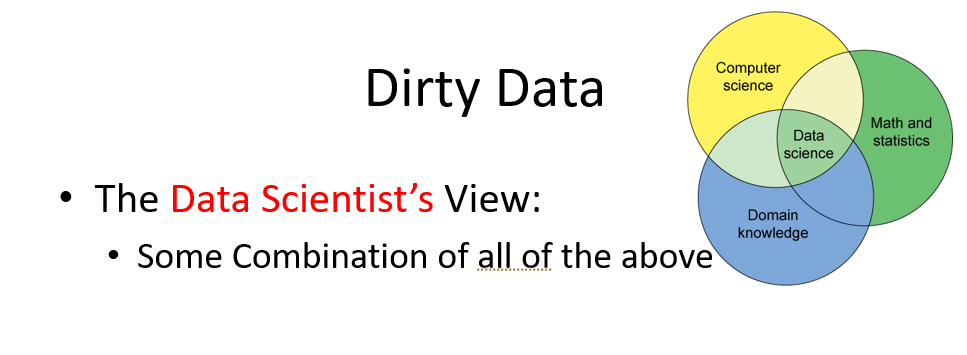

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

## What is common missing values?

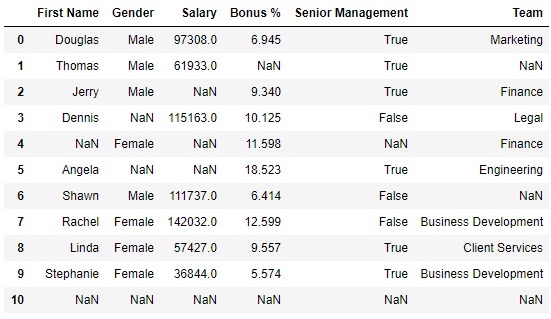

## Detect and Remove the missing values..

### Import Libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read Data 

In [2]:
df_movies = pd.read_csv("movies.csv")

In [3]:
df_movies.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4993 non-null   float64
 1   duration                   5028 non-null   float64
 2   director_facebook_likes    4939 non-null   float64
 3   actor_3_facebook_likes     5020 non-null   float64
 4   actor_1_facebook_likes     5036 non-null   float64
 5   gross                      4159 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5030 non-null   float64
 9   num_user_for_reviews       5022 non-null   float64
 10  budget                     4551 non-null   float64
 11  title_year                 4935 non-null   float64
 12  actor_2_facebook_likes     5030 non-null   float64
 13  imdb_score                 5043 non-null   float

### How many missing values??

In [5]:
df_movies.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

That seems like a lot!

Drop missing values
If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. (Note: I don't generally recommend this approch for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.)

If you're sure you want to drop rows with missing values, pandas does have a handy function, dropna() to help you do this. Let's try it out on our NFL dataset!

In [6]:
df_movies.shape

(5043, 16)

In [8]:
#make a copy of orignal data
df_copy = df_movies.copy()

In [9]:
# remove all the rows that contain a missing value
df_movies = df_movies.dropna()

In [10]:
df_movies.shape  

(3801, 16)

NOT RECOMMENDED MOST OF THE TIME ⚠️

### Impute missing values with each column median..

In [11]:
df_with_non_miss = df_copy.fillna(df_copy.median())

In [12]:
df_with_non_miss.shape

(5043, 16)

In [13]:
df_with_non_miss.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

## Detect and Remove the Duplicates

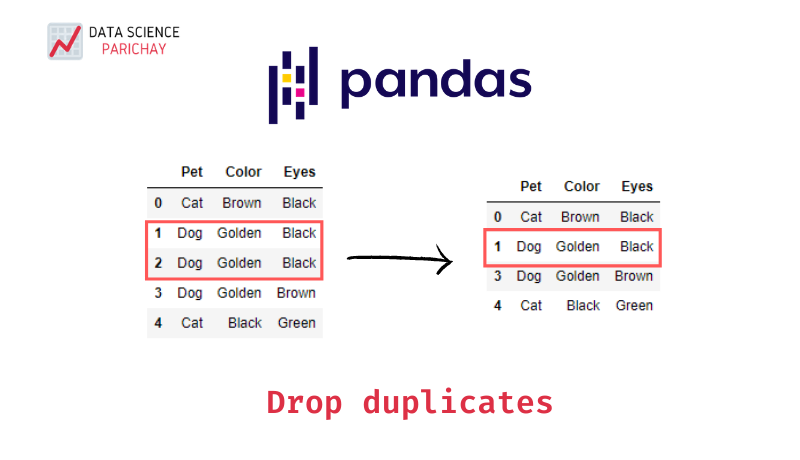

In [14]:
df_with_non_miss.duplicated().sum()

45

In [15]:
df_with_non_miss.drop_duplicates(inplace= True)

In [16]:
df_with_non_miss.duplicated().sum()

0

## Detect and Remove the Outliers 

Outlier is a data that deviates significantly from the rest of the (so-called normal)objects.

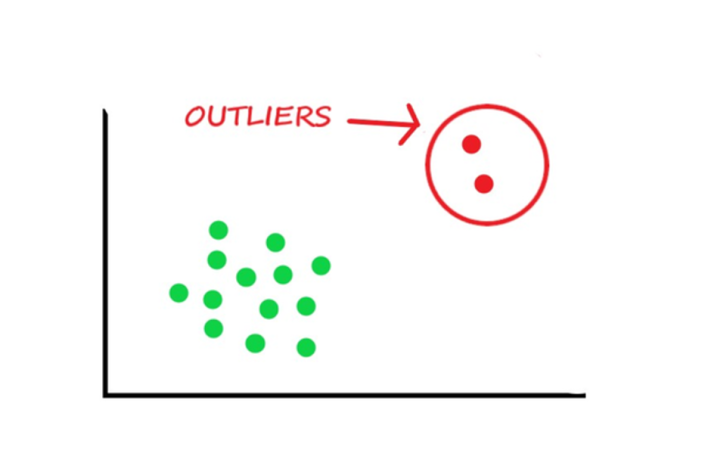  


Outliers can be detected using **visualization**, **implementing mathematical formulas** on the dataset, or using the **statistical approach**. All of these are discussed below. 

## 1. Visualization


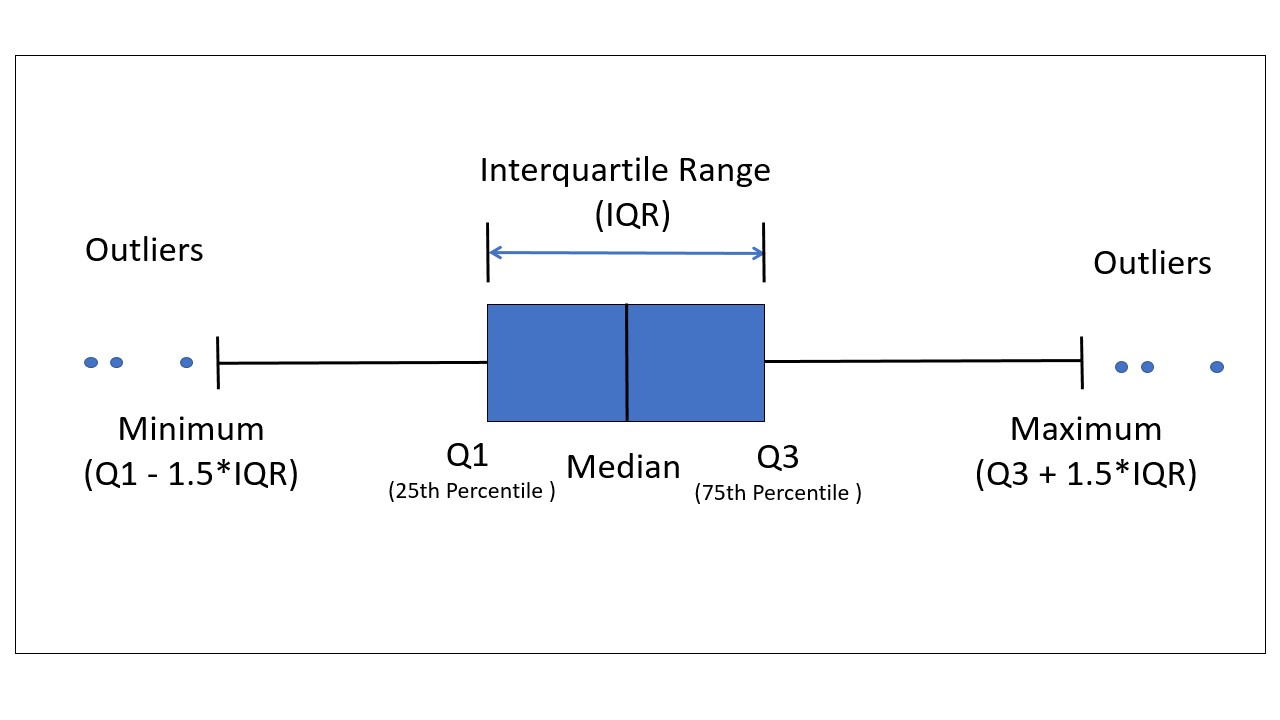

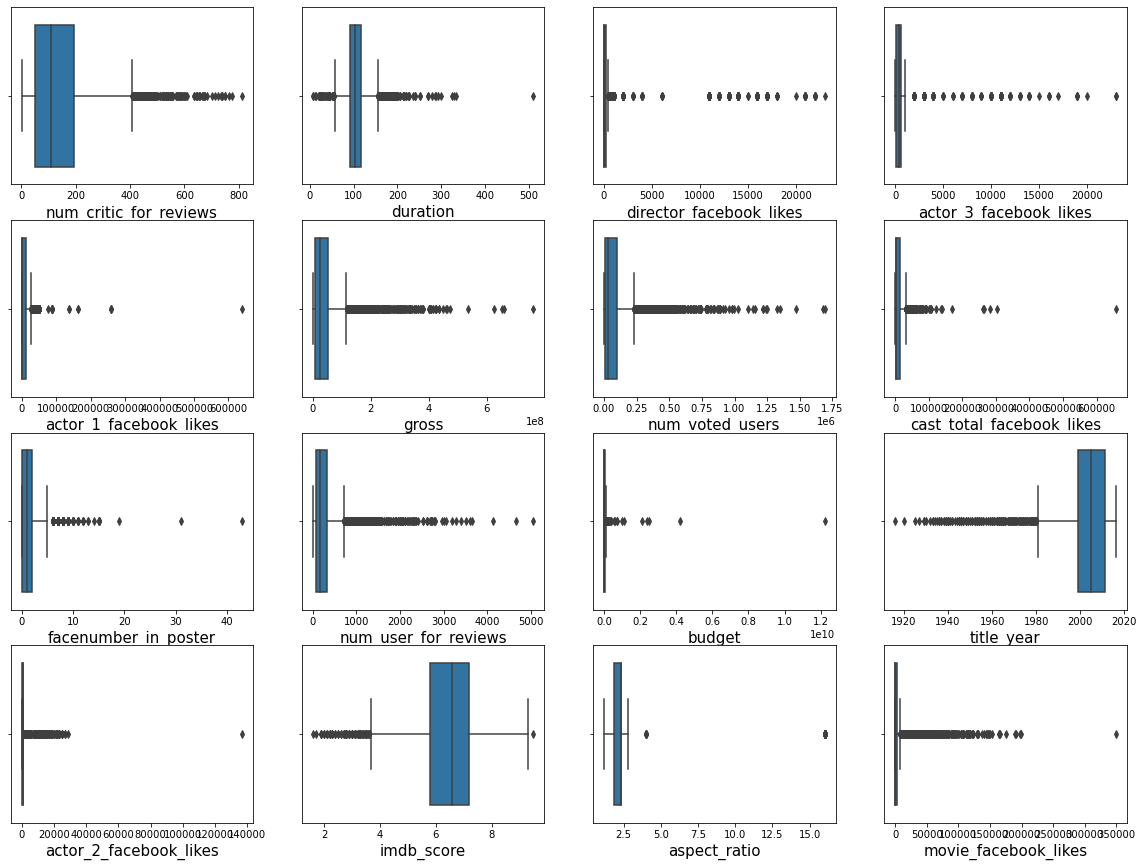

In [17]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(df_with_non_miss.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df_with_non_miss,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [18]:
# Function to detect outliers in every feature and fix it
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in df.columns:
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df_with_non_miss)

,Feature,NO Outliers,Handled?
0,num_critic_for_reviews,206,True
1,duration,240,True
2,director_facebook_likes,619,True
3,actor_3_facebook_likes,170,True
4,actor_1_facebook_likes,169,True
5,gross,469,True
6,num_voted_users,463,True
7,cast_total_facebook_likes,348,True
8,facenumber_in_poster,208,True
9,num_user_for_reviews,391,True


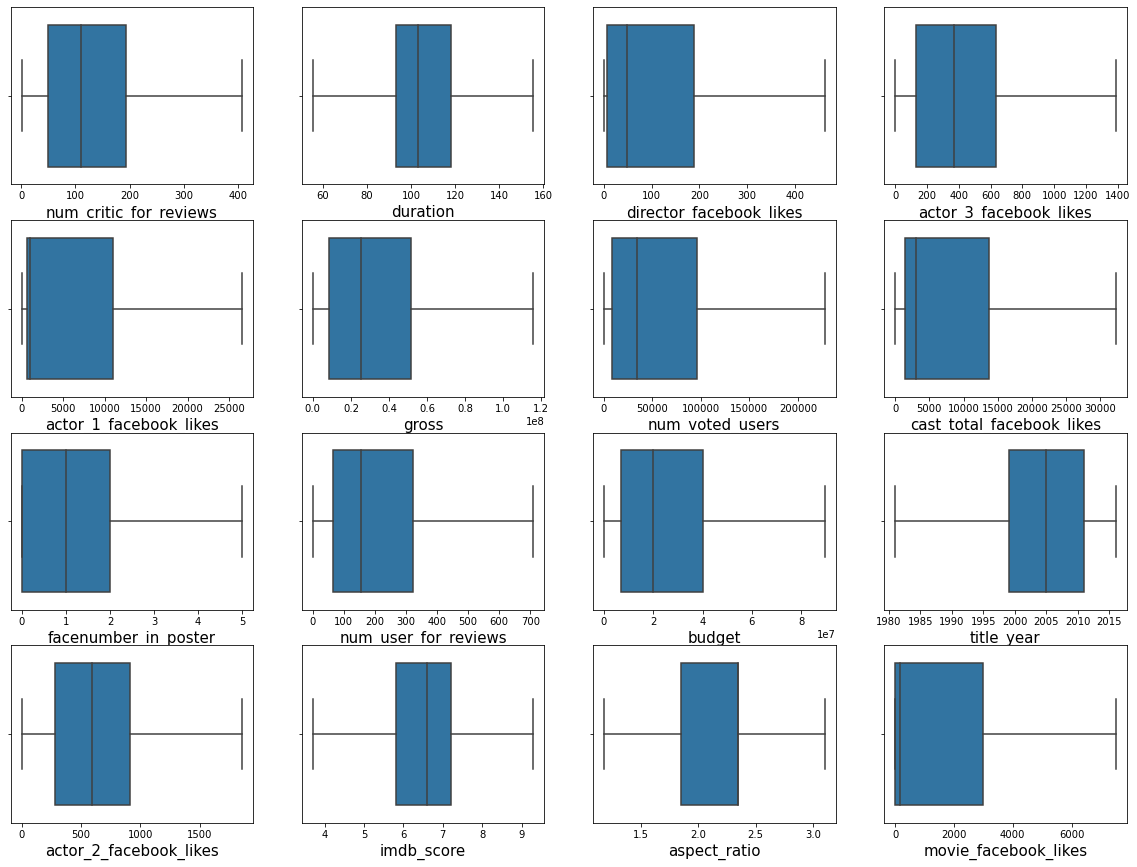

In [19]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(df_with_non_miss.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df_with_non_miss,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)